In [0]:
# Description This is a sentiment analysis programe that parses the tweets fetched from twitter using python

In [0]:
#Import Libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
#load the data
from google.colab import files 
uploaded = files.upload()


Saving Login.csv to Login (4).csv


In [0]:
# Get the data
log = pd.read_csv('Login (4).csv')

In [0]:
#Twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [0]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret) 
authenticate.set_access_token(accessToken,accessTokenSecret)
api=tweepy.API(authenticate,wait_on_rate_limit=True)



In [0]:
#Extract 100 tweets from the twitter user
posts=api.user_timeline(screen_name="UN" , count=5000 , lang = "en" , tweet_mode ="extended")

#print the last 5 tweets from account
print("Show the last 5 tweets : \n")
i=1
for tweet in posts[0:5]:
  print(str(i) + ') ' +tweet.full_text + '\n')
  i = i+1

Show the last 5 tweets : 

1) RT @UNmigration: Hundreds of Rohingya refugees are stranded at sea at start of monsoon season. 

Their rescue and safe disembarkation is a…

2) Friday is International Day of UN Peacekeepers. 

More women in @UNPeacekeeping means:
🔑 increased effectiveness
🔑 new perspectives and solutions
🔑 greater resources
🔑 stronger efforts towards peace process

More on this year's #PKDay: https://t.co/IHPy950Ab4 https://t.co/oEDf3thUR4

3) RT @UN_SPExperts: UN experts call on States to protect the rights of #migrants and their families, regardless of their migration status, du…

4) RT @UNDP: Destroyed habitats create perfect conditions for zoonotic diseases like #COVID19 to emerge. Today, we are facing the consequences…

5) "#COVID19 is not just this century’s largest public health emergency, but also a communication crisis."

--UN global communications chief @MelissaFleming on the new 'Verified' initiative to bring people trusted information &amp; life-saving advice.

In [0]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for  tweet in posts] , columns=['Tweets'] )

# Show the first 5 rows of data
df.head()

,Tweets
0,RT @UNmigration: Hundreds of Rohingya refugees...
1,Friday is International Day of UN Peacekeepers...
2,RT @UN_SPExperts: UN experts call on States to...
3,RT @UNDP: Destroyed habitats create perfect co...
4,"""#COVID19 is not just this century’s largest p..."


In [0]:
#Clean the text
#Create a function to clean the tweets
def cleanTxt(text):
  text=re.sub(r'@[A-Za-z0-9]','', text) # Removed @ metion
  text=re.sub(r'#','',text) #Removing the '#' symbol
  text=re.sub(r'RT[\s]+' , '', text) #Removing RT
  text=re.sub(r'htttps?:\/\/\s+','',text) #Removing the hyper link

  return text

#Cleaning the Text
df['Tweets']=df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df

,Tweets
0,Nmigration: Hundreds of Rohingya refugees are ...
1,Friday is International Day of UN Peacekeepers...
2,N_SPExperts: UN experts call on States to prot...
3,NDP: Destroyed habitats create perfect conditi...
4,"""COVID19 is not just this century’s largest pu..."
...,...
195,efugees: “Venezuelans across the region are no...
196,"NICEF: 6,000 more children could die each day ..."
197,The UN is working to save lives amid the COVID...
198,"NCTAD: How to re-open schools and businesses, ..."


In [0]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show new dataframe with new columns
df

,Tweets,Subjectivity,Polarity
0,Nmigration: Hundreds of Rohingya refugees are ...,0.500000,0.500000
1,Friday is International Day of UN Peacekeepers...,0.390909,0.327273
2,N_SPExperts: UN experts call on States to prot...,0.000000,0.000000
3,NDP: Destroyed habitats create perfect conditi...,1.000000,1.000000
4,"""COVID19 is not just this century’s largest pu...",0.173737,0.045455
...,...,...,...
195,efugees: “Venezuelans across the region are no...,0.000000,0.000000
196,"NICEF: 6,000 more children could die each day ...",0.437500,0.187500
197,The UN is working to save lives amid the COVID...,0.500000,0.166667
198,"NCTAD: How to re-open schools and businesses, ...",0.000000,0.000000


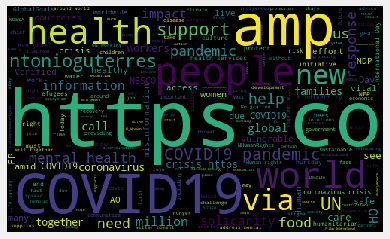

In [0]:
# Plot the word Cloud
allWords=' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500 , height=300 , random_state = 21 , max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "none")
plt.axis('off')
plt.show()

In [0]:
# Create a function to compute the negative , neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
#Show Data Frame
df


,Tweets,Subjectivity,Polarity,Analysis
0,Nmigration: Hundreds of Rohingya refugees are ...,0.500000,0.500000,Positive
1,Friday is International Day of UN Peacekeepers...,0.390909,0.327273,Positive
2,N_SPExperts: UN experts call on States to prot...,0.000000,0.000000,Neutral
3,NDP: Destroyed habitats create perfect conditi...,1.000000,1.000000,Positive
4,"""COVID19 is not just this century’s largest pu...",0.173737,0.045455,Positive
...,...,...,...,...
195,efugees: “Venezuelans across the region are no...,0.000000,0.000000,Neutral
196,"NICEF: 6,000 more children could die each day ...",0.437500,0.187500,Positive
197,The UN is working to save lives amid the COVID...,0.500000,0.166667,Positive
198,"NCTAD: How to re-open schools and businesses, ...",0.000000,0.000000,Neutral


In [0]:
# Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0 , sortedDF.shape[0]):
  if(sortedDF ['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1


1) Nmigration: Hundreds of Rohingya refugees are stranded at sea at start of monsoon season. 

Their rescue and safe disembarkation is a…

2) Friday is International Day of UN Peacekeepers. 

More women in NPeacekeeping means:
🔑 increased effectiveness
🔑 new perspectives and solutions
🔑 greater resources
🔑 stronger efforts towards peace process

More on this year's PKDay: https://t.co/IHPy950Ab4 https://t.co/oEDf3thUR4

3) NDP: Destroyed habitats create perfect conditions for zoonotic diseases like COVID19 to emerge. Today, we are facing the consequences…

4) "COVID19 is not just this century’s largest public health emergency, but also a communication crisis."

--UN global communications chief elissaFleming on the new 'Verified' initiative to bring people trusted information &amp; life-saving advice. 

https://t.co/O1K8Xju2zD

5) HO: The inions &amp; Gru are supporting WHO in making sure people of all ages stay safe and healthy during this COVID19 pandemic:
💛 phy…

6) The world must un

In [0]:
#print the negative tweets
j=1
sortedDF = df.sort_values(by= ['Polarity'] ,ascending= 'False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print ()
    j = j+1


1) Let's end the stigma around menstruation. Period. 

On Thursday's MenstrualHygieneDay &amp; every day, N_Women works to safeguard the health of women &amp; girls without stress, shame, or unnecessary barriers to information or menstrual supplies.  https://t.co/wDyrYe6sF1 https://t.co/ZfDQn8RvpC

2) NFCCC: Groups representing 40 million health professionals 👩‍⚕️ 👨‍⚕️ are calling for a sustainable, green recovery from COVID19 https…

3) NOCHA: We are extremely concerned by the rapid spread of COVID19 across Yemen.
Distressing reports are being heard from across the co…

4) Misinformation is harmful. If we didn't share bad content we wouldn't have a problem.

— irstdraftnews' Claire Wardle on how to stop yourself &amp; others sharing misinformation around COVID19.

Get more Verified information: https://t.co/WdwMDqm3c1 https://t.co/yXn4OYLOKh

5) NCTAD: COVID19 has heightened the urgency of improving access to essential medicines for vulnerable populations.

NCTAD and the H…

6) elissa

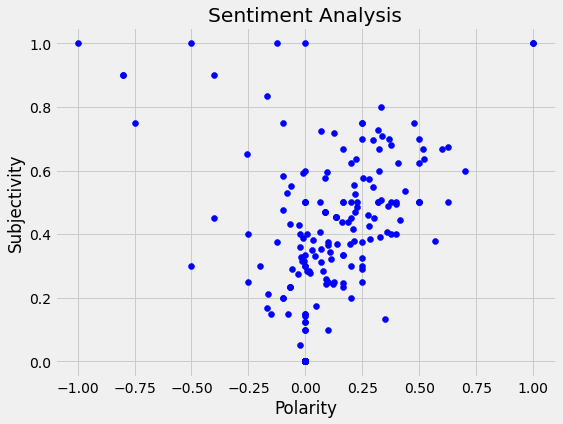

In [0]:
# Plot the polarity and subjctivity
plt.figure(figsize = (8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [0]:
#Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
round((ptweets.shape[0] / df.shape[0]) *100, 1)

55.5

In [0]:
# Get the percentage of negative tweeets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) *100 , 1)

20.5

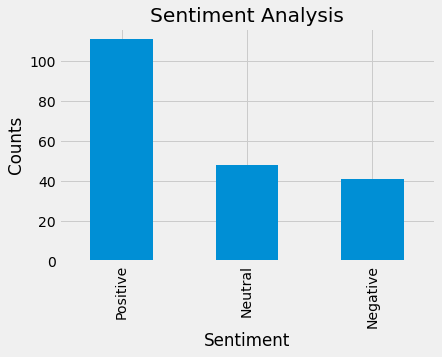

In [0]:
# Show the value counts
df['Analysis'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()